<center><h1><strong>Elastic Net Regression</strong></h1></center>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

import data

In [3]:
x,y = load_diabetes(return_X_y=True)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Scale features

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train ElasticNet model

In [6]:
regression = ElasticNet(alpha=0.1,l1_ratio=0.5)
model = regression.fit(x_train,y_train)
y_pred = model.predict(x_test)

Check the r2 score

In [7]:
score = r2_score(y_test,y_pred)
print(score)

0.4589695819678379


Visualize the coefficients

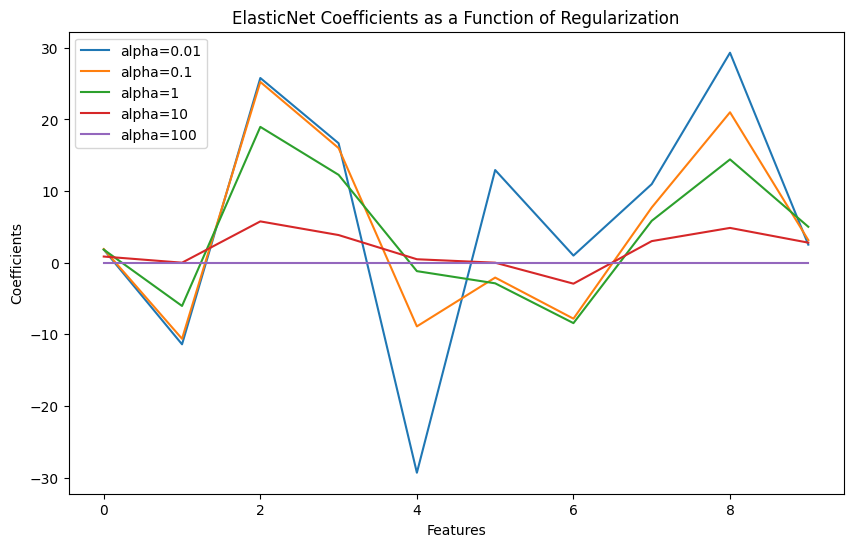

In [10]:
alphas = [0.01, 0.1, 1, 10, 100]
coef = []

for a in alphas:
    en = ElasticNet(alpha=a,l1_ratio=0.5)
    en.fit(x_train,y_train)
    coef.append(en.coef_)

plt.figure(figsize=(10,6))
for i in range(len(coef)):
    plt.plot(coef[i],label=f'alpha={alphas[i]}')

plt.legend()
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("ElasticNet Coefficients as a Function of Regularization")
plt.show()

Feature selection visualization

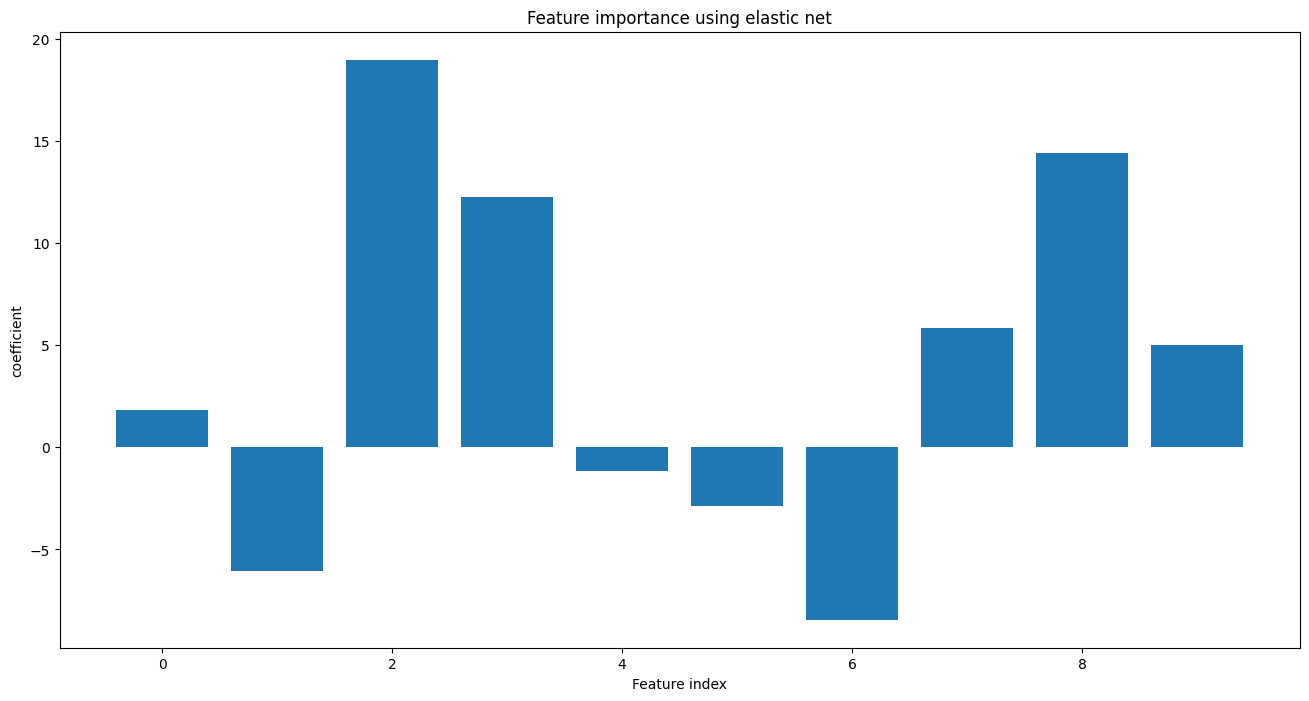

In [11]:
plt.figure(figsize=(16,8))
plt.bar(range(len(coef[2])),coef[2])
plt.title("Feature importance using elastic net")
plt.xlabel("Feature index")
plt.ylabel("coefficient")
plt.show()

Linear -> No Shrinkage<br>
Ridge -> Shrinks coefficients</br>
Lasso -> Shrinks + removes features</br>
Elastic Net -> Shrinks + removes + handles the correlation